In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [123]:
dataset = pd.read_csv('data/breastcancel.csv')

In [124]:
dataset.head()
#M : malignant 악성
#B : benign 양성

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [125]:
diagnosis_mapping = {"M": 0, "B": 1}
for feature in [dataset]:
    feature['diagnosis'] = feature['diagnosis'].map(diagnosis_mapping)

In [126]:
x_data=dataset.iloc[:,2:32]
y_data=dataset.iloc[:,1]

In [127]:
x_data.shape , y_data.shape

((569, 30), (569,))

In [128]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state=0)

In [129]:
x_train.shape , y_train.shape, x_test.shape, y_test.shape

((455, 30), (455,), (114, 30), (114,))

In [138]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [139]:
x_train

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

In [147]:
x_test

array([[[-0.20175604],
        [ 0.3290786 ],
        [-0.13086754],
        ...,
        [ 1.3893291 ],
        [ 1.08203284],
        [ 1.54029664]],

       [[-0.25555773],
        [ 1.46763319],
        [-0.31780437],
        ...,
        [-0.83369364],
        [-0.73131577],
        [-0.87732522]],

       [[-0.02619262],
        [-0.8407682 ],
        [-0.09175081],
        ...,
        [-0.49483785],
        [-1.22080864],
        [-0.92115937]],

       ...,

       [[ 1.71811488],
        [ 0.09318356],
        [ 1.7286186 ],
        ...,
        [ 1.57630515],
        [ 0.20317063],
        [-0.15406178]],

       [[ 1.18859296],
        [ 0.34352115],
        [ 1.19333694],
        ...,
        [ 0.56019755],
        [ 0.26991966],
        [-0.27320074]],

       [[ 0.26263752],
        [-0.58080224],
        [ 0.28459338],
        ...,
        [-0.19383705],
        [-1.15564888],
        [ 0.11231497]]])

In [142]:
x_train=x_train.reshape(455,30,1)
x_test=x_test.reshape(114,30,1)

In [152]:
y_train=np.array(y_train)
y_test=np.array(y_test)

In [153]:
model=Sequential()
model.add(Conv1D(filters=32,kernel_size=2,activation='relu',input_shape=(30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64,kernel_size=2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [154]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_2 (Batch (None, 29, 32)            128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 29, 32)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1792)             

In [155]:
model.compile(optimizer=Adam(learning_rate=0.00005),loss='binary_crossentropy',metrics=['accuracy'])

In [156]:
hist=model.fit(x_train,y_train, epochs=50,validation_split=0.2,verbose=1)

Train on 364 samples, validate on 91 samples
Epoch 1/50
364/364 [==============================] - 2s 4ms/sample - loss: 1.1450 - accuracy: 0.5302 - val_loss: 0.6874 - val_accuracy: 0.5714
Epoch 2/50
364/364 [==============================] - 0s 168us/sample - loss: 0.8328 - accuracy: 0.6319 - val_loss: 0.6601 - val_accuracy: 0.7802
Epoch 3/50
364/364 [==============================] - 0s 183us/sample - loss: 0.7269 - accuracy: 0.6951 - val_loss: 0.6346 - val_accuracy: 0.8022
Epoch 4/50
364/364 [==============================] - 0s 183us/sample - loss: 0.5344 - accuracy: 0.7610 - val_loss: 0.6125 - val_accuracy: 0.7802
Epoch 5/50
364/364 [==============================] - 0s 185us/sample - loss: 0.5112 - accuracy: 0.7885 - val_loss: 0.5903 - val_accuracy: 0.7692
Epoch 6/50
364/364 [==============================] - 0s 220us/sample - loss: 0.4615 - accuracy: 0.8352 - val_loss: 0.5667 - val_accuracy: 0.7802
Epoch 7/50
364/364 [==============================] - 0s 183us/sample - loss: 0.4

In [161]:
model.evaluate(x_test,y_test)

114/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.11476883344482958, 0.9385965]

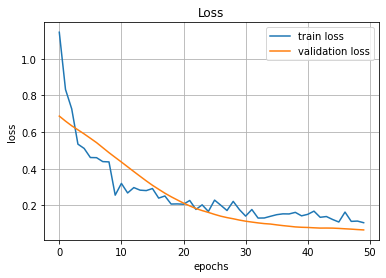

In [159]:
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

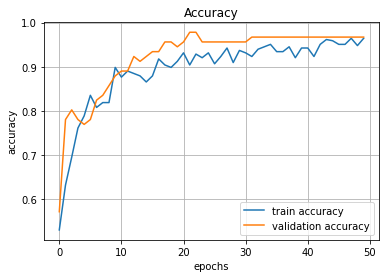

In [158]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()

In [164]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [170]:
y_pred=model.predict_classes(x_test)

In [171]:
y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [172]:
y_pred

array([[0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
    

In [165]:
mat=confusion_matrix(y_test,y_pred)

In [167]:
mat

array([[44,  3],
       [ 4, 63]], dtype=int64)

(<Figure size 288x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

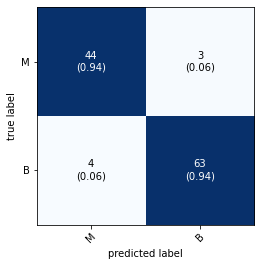

In [174]:
plot_confusion_matrix(mat,figsize=(4,4),class_names=['M','B'],show_normed=True)